<a href="https://colab.research.google.com/github/Jaellop/Telecom.X/blob/main/Telecom_X3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introducción##

 El objetivo del análisis que se presenta a continuación es identificar si existe una correlación entre los usuarios que cancelaron el servicio de Telecom en los últimos 72 meses y los servicios contratados durante el tiempo de duración del contrato con el objetivo de plantear estrategias que mejoren la retención de los usuarios en los sectores identificados y disminuir las perdidas económicas en los próximos meses.


##Importando Pandas y Leyendo el dataset del projecto##

In [1]:
import pandas as pd

In [2]:
df = pd.read_json('/content/TelecomX_Data (1).json')
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


##Tipos de datos##

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


##Eliminacion de observaciones donde hay datos vacios e invalidos##


Para realizar la eliminación de datos vacios en la columna 'Churn' se procedio a explorar los datos en la columna, eliminar con el uso de strip los espacios representados con ' ' y con el uso de isna los valores invalidos para la columna charges_total ( la columna se visualiza después de descomprimir el diccionario 'account'). Se ajustó el indice para contemplar los datos de 7032 filas en vez de las iniciales 7266.

In [4]:
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [5]:
df = df[~df['Churn'].str.strip().eq('')]
df['Churn'].unique()


array(['No', 'Yes'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7043 non-null   object
 1   Churn       7043 non-null   object
 2   customer    7043 non-null   object
 3   phone       7043 non-null   object
 4   internet    7043 non-null   object
 5   account     7043 non-null   object
dtypes: object(6)
memory usage: 385.2+ KB


In [7]:
df = df.reset_index(drop=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7043 non-null   object
 1   Churn       7043 non-null   object
 2   customer    7043 non-null   object
 3   phone       7043 non-null   object
 4   internet    7043 non-null   object
 5   account     7043 non-null   object
dtypes: object(6)
memory usage: 330.3+ KB


In [9]:
df['customerID'].duplicated().any()


np.False_

In [10]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [11]:
df['Churn'].value_counts()


,count
Churn,
0,5174
1,1869


In [12]:
df_customer = pd.json_normalize(df['customer'])
df_customer.sample(15)

,gender,SeniorCitizen,Partner,Dependents,tenure
6176,Female,0,Yes,Yes,46
1163,Female,0,No,No,42
4790,Female,0,No,No,3
2790,Female,0,Yes,No,58
195,Female,0,Yes,No,71
2799,Male,1,Yes,Yes,65
1800,Female,0,Yes,Yes,68
4317,Male,0,Yes,No,72
3595,Female,0,Yes,No,3
677,Female,1,Yes,No,68


In [13]:
df_customer['gender'].unique()

array(['Female', 'Male'], dtype=object)

##Estandarizacion de datos##

In [14]:
df_customer['gender'] = df_customer['gender'].map({'Female': 1, 'Male': 0})


In [15]:
df_customer['gender'].value_counts()


,count
gender,
0,3555
1,3488


In [16]:
df_customer['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
df_customer['Dependents'].unique()

array(['Yes', 'No'], dtype=object)

##Descompresion de Columnas anidadas##

In [18]:
df_flat = pd.concat([
    df[['customerID', 'Churn']],
    pd.json_normalize(df['customer']),
    pd.json_normalize(df['phone']),
    pd.json_normalize(df['internet']),
    pd.json_normalize(df['account']),
     ], axis=1)

In [19]:
df_flat.sample(20)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
941,1360-RCYRT,0,Male,0,Yes,Yes,23,No,No phone service,DSL,...,No,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),30.35,678.75
469,0685-MLYYM,1,Female,1,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Electronic check,70.75,154.85
6875,9767-FFLEM,0,Male,0,No,No,38,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25
4095,5789-LDFXO,0,Male,0,No,No,24,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.60,592.65
4554,6418-PIQSP,0,Female,0,Yes,No,62,Yes,No,DSL,...,No,Yes,Yes,Yes,Yes,Two year,No,Mailed check,81.00,4985.9
3349,4776-XSKYQ,0,Female,0,Yes,Yes,12,No,No phone service,DSL,...,No,No,Yes,No,No,One year,No,Credit card (automatic),30.25,368.85
2439,3494-JCHRQ,1,Male,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.05,70.05
2115,3038-PQIUY,0,Female,0,No,No,38,Yes,Yes,DSL,...,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),66.15,2522.4
1674,2439-QKJUL,0,Male,0,No,No,5,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,109.8
124,0218-QNVAS,0,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,One year,No,Bank transfer (automatic),100.55,7113.75


##Transformacion de datos columna Charges.Total a datos numericos##

In [20]:
df_flat['Charges.Total'] = pd.to_numeric(df_flat['Charges.Total'], errors='coerce')


In [21]:
df_flat['Charges.Total']

,Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40
...,...
7038,742.90
7039,1873.70
7040,92.75
7041,4627.65


##Eliminacion de Valores Invalidos en la columna Charges.Total##

In [22]:
df_flat['Charges.Total'].isna().sum()

np.int64(11)

In [23]:
df_flat[df_flat.isna().any(axis=1)]


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
945,1371-DWPAZ,0,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1731,2520-SGTTA,0,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1906,2775-SEFEE,0,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2025,2923-ARZLG,0,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2176,3115-CZMZD,0,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2250,3213-VVOLG,0,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2855,4075-WKNIU,0,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3052,4367-NUYAO,0,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3118,4472-LVYGI,0,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4054,5709-LVOEQ,0,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [24]:
df_new = df_flat.drop([945, 1731, 1906, 2025, 2176, 2250, 2855, 3052, 3118, 4054, 5433])


In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   int64  
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

In [26]:
df_new= df_new.reset_index(drop=True)

In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   int64  
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


In [28]:
df_new['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [29]:
df_new['SeniorCitizen'].unique()

array([0, 1])

In [30]:
df_new['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5890
1,1142


In [31]:
df_new['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


##Analisis exploratorio de los datos##

In [32]:
df_new['gender'] = df_new['gender'].map({'Female': 1, 'Male': 0})
df_new['Partner'] = df_new['Partner'].map({'Yes': 1, 'No': 0})
df_new['Dependents'] = df_new['Dependents'].map({'Yes': 1, 'No': 0})
df_new['PaperlessBilling'] = df_new['PaperlessBilling'].map({'Yes': 1, 'No': 0})


Se presenta la proporcion de personas por genero, dependientes y la preferencia por la factura electronica.

In [33]:
porcentaje_sexo = df_new['gender'].value_counts(normalize=True).round(4)*100
porcentaje_sexo

,proportion
gender,
0,50.47
1,49.53


In [34]:
frecuencia_sexo = df_new['gender'].value_counts()
frecuencia_sexo

,count
gender,
0,3549
1,3483


In [35]:
dist_frec_cualitativa = pd.DataFrame({'Frecuencia' : frecuencia_sexo, 'Porcentaje %' : porcentaje_sexo})
dist_frec_cualitativa.rename(index = {0:'Male' , 1: 'Female'},  inplace = True)
dist_frec_cualitativa.rename_axis('Sexo', axis='columns', inplace = True)
dist_frec_cualitativa

Sexo,Frecuencia,Porcentaje %
gender,,
Male,3549,50.47
Female,3483,49.53


In [36]:
df_new['Partner'].value_counts(normalize=True).round(4)*100


,proportion
Partner,
0,51.75
1,48.25


In [37]:
df_new['Dependents'].value_counts(normalize=True).round(4)*100

,proportion
Dependents,
0,70.15
1,29.85


In [38]:
df_new['PaperlessBilling'].value_counts(normalize=True).round(4)*100

,proportion
PaperlessBilling,
1,59.27
0,40.73


In [39]:
df_encoded = pd.get_dummies(df_new, columns=[
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaymentMethod'
])


In [40]:
df_encoded.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,Charges.Monthly,Charges.Total,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,0,1,0,1,1,9,1,65.6,593.30,...,True,False,False,False,True,False,False,False,False,True
1,0003-MKNFE,0,0,0,0,0,9,0,59.9,542.40,...,False,False,True,True,False,False,False,False,False,True
2,0004-TLHLJ,1,0,0,0,0,4,1,73.9,280.85,...,True,False,False,True,False,False,False,False,True,False
3,0011-IGKFF,1,0,1,1,0,13,1,98.0,1237.85,...,False,False,True,True,False,False,False,False,True,False
4,0013-EXCHZ,1,1,1,1,0,3,1,83.9,267.40,...,True,False,False,True,False,False,False,False,False,True


In [41]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   Churn                                    7032 non-null   int64  
 2   gender                                   7032 non-null   int64  
 3   SeniorCitizen                            7032 non-null   int64  
 4   Partner                                  7032 non-null   int64  
 5   Dependents                               7032 non-null   int64  
 6   tenure                                   7032 non-null   int64  
 7   PaperlessBilling                         7032 non-null   int64  
 8   Charges.Monthly                          7032 non-null   float64
 9   Charges.Total                            7032 non-null   float64
 10  PhoneService_No                          7032 no

##**Distribución de frecuencias asociadas a Churn**

Se realiza un analisis crosstab y barras apiladas de las siguientes variables que estan asociadas a cuentas canceladas:   

gender, partner, dependents, PaperlessBilling,senior, PhoneService, StreamingTV, StreamingMovies, NoInternetService

In [42]:
df_encoded['Cuentas_Diarias'] = df_encoded['Charges.Monthly'] / 30.44


In [43]:
df_encoded['Cuentas_Diarias'] = df_encoded['Cuentas_Diarias'].round(2)
df_encoded

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,Charges.Monthly,Charges.Total,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cuentas_Diarias
0,0002-ORFBO,0,1,0,1,1,9,1,65.60,593.30,...,False,False,False,True,False,False,False,False,True,2.16
1,0003-MKNFE,0,0,0,0,0,9,0,59.90,542.40,...,False,True,True,False,False,False,False,False,True,1.97
2,0004-TLHLJ,1,0,0,0,0,4,1,73.90,280.85,...,False,False,True,False,False,False,False,True,False,2.43
3,0011-IGKFF,1,0,1,1,0,13,1,98.00,1237.85,...,False,True,True,False,False,False,False,True,False,3.22
4,0013-EXCHZ,1,1,1,1,0,3,1,83.90,267.40,...,False,False,True,False,False,False,False,False,True,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,0,1,0,0,0,13,0,55.15,742.90,...,False,False,False,True,False,False,False,False,True,1.81
7028,9992-RRAMN,1,0,0,1,0,22,1,85.10,1873.70,...,False,True,True,False,False,False,False,True,False,2.80
7029,9992-UJOEL,0,0,0,0,0,2,1,50.30,92.75,...,False,False,True,False,False,False,False,False,True,1.65
7030,9993-LHIEB,0,0,0,1,1,67,0,67.85,4627.65,...,False,True,False,False,True,False,False,False,True,2.23


In [44]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   Churn                                    7032 non-null   int64  
 2   gender                                   7032 non-null   int64  
 3   SeniorCitizen                            7032 non-null   int64  
 4   Partner                                  7032 non-null   int64  
 5   Dependents                               7032 non-null   int64  
 6   tenure                                   7032 non-null   int64  
 7   PaperlessBilling                         7032 non-null   int64  
 8   Charges.Monthly                          7032 non-null   float64
 9   Charges.Total                            7032 non-null   float64
 10  PhoneService_No                          7032 no

In [45]:
## Variables cualitativas Ordinales -
##Varables cualitativas Nominales - gender, partner, SeniorCitizen, Dependents, PaperlessBilling,
## y las variables codificadas como bool
##Variables cuantitativas Discretas - tenure
##Variable cuantitativas Continuas - charges.Montly y Charges.Total

In [46]:
df_encoded['Contract_Month-to-month'].unique()

array([False,  True])

In [47]:
month= {0: 'False', 1: 'True' }
churn = { 0 : 'No', 1 : 'Yes'}


In [48]:
frecuencia = pd.crosstab (df_encoded['Churn'],
                         df_encoded['Contract_Month-to-month'], normalize= True).round(4)*100
frecuencia.rename(index = churn, inplace = True)
frecuencia.rename(columns = month, inplace = True)
frecuencia

Contract_Month-to-month,False,True
Churn,,
No,41.85,31.57
Yes,3.04,23.54


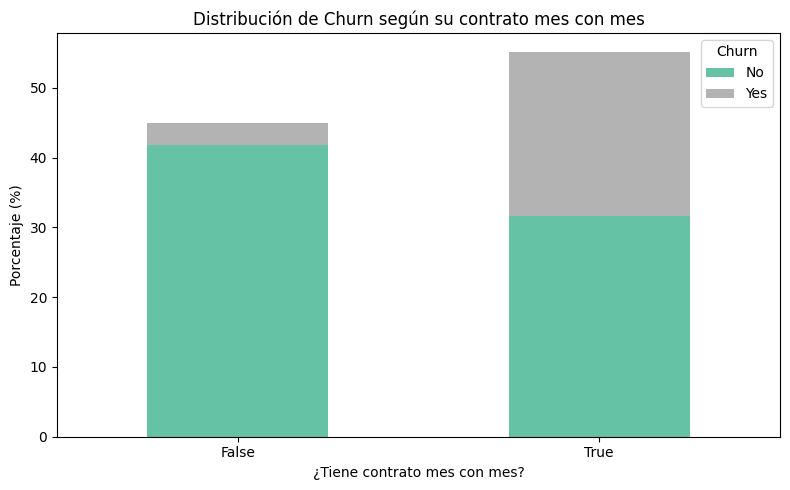

In [49]:
import matplotlib.pyplot as plt

# Gráfica de barras apiladas
frecuencia.T.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')

# Personalización
plt.title("Distribución de Churn según su contrato mes con mes")
plt.xlabel("¿Tiene contrato mes con mes?")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Churn")
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar
plt.show()


In [50]:
churn = { 0 : 'No', 1 : 'Yes'}

gender = {0: 'Male', 1:'Female'}

partner = {0 : 'No', 1 : 'Yes'}

dependents = {0 : 'No', 1 : 'Yes'}

PaperlessBilling = {0 : 'No', 1 : 'Yes'}

senior = {0 : 'No', 1 : 'Yes'}

PhoneService = {0 : 'False', 1 : 'True'}

StreamingTV = {0 : 'False', 1 : 'True'}

StreamingMovies = {0 : 'False', 1 : 'True'}

NoInternetService = {0 : 'False', 1 : 'True'}


In [51]:
frecuencia = pd.crosstab (df_encoded['Churn'],
                         df_encoded['SeniorCitizen'], normalize= True).round(4)*100
frecuencia.rename(index = churn, inplace = True)
frecuencia.rename(columns = senior, inplace = True)
frecuencia


SeniorCitizen,No,Yes
Churn,,
No,63.95,9.47
Yes,19.81,6.77


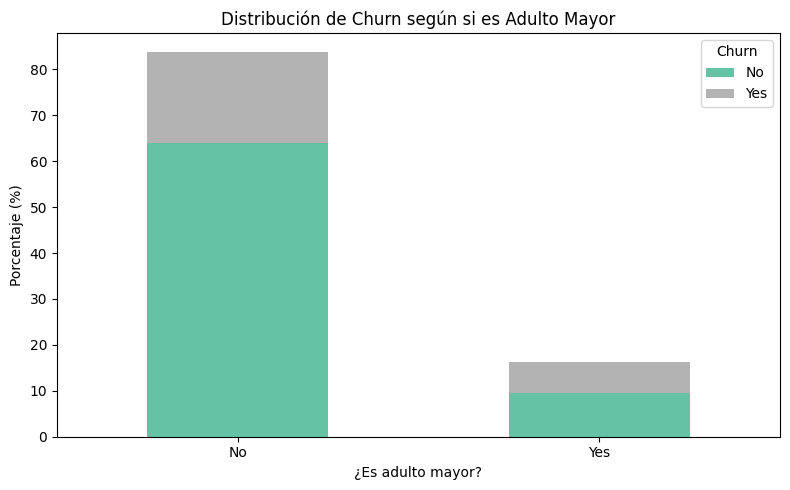

In [52]:
import matplotlib.pyplot as plt

# Gráfica de barras apiladas
frecuencia.T.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')

# Personalización
plt.title("Distribución de Churn según si es Adulto Mayor")
plt.xlabel("¿Es adulto mayor?")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Churn")
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar
plt.show()



In [53]:
frecuencia = pd.crosstab (df_encoded['Churn'],
                         df_encoded['gender'], normalize= True).round(4)*100
frecuencia.rename(index = churn, inplace = True)
frecuencia.rename(columns = gender, inplace = True)
frecuencia


gender,Male,Female
Churn,,
No,37.24,36.18
Yes,13.23,13.35


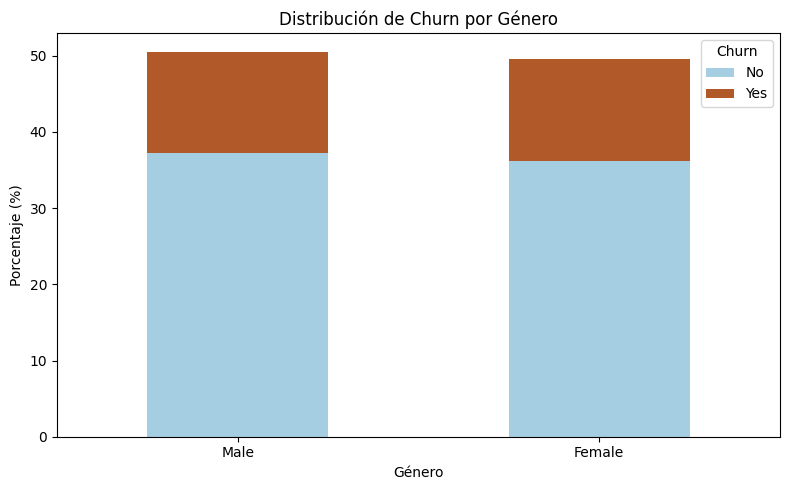

In [54]:
import matplotlib.pyplot as plt

# Gráfica de barras apiladas (transponer para agrupar por género)
frecuencia.T.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Paired')

# Personalización del gráfico
plt.title("Distribución de Churn por Género")
plt.xlabel("Género")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Churn")
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar gráfico
plt.show()



In [55]:
frecuencia = pd.crosstab (df_encoded['Churn'],
                         df_encoded['Dependents'], normalize= True).round(4)*100
frecuencia.rename(index = churn, inplace = True)
frecuencia.rename(columns = dependents, inplace = True)
frecuencia


Dependents,No,Yes
Churn,,
No,48.21,25.21
Yes,21.94,4.64


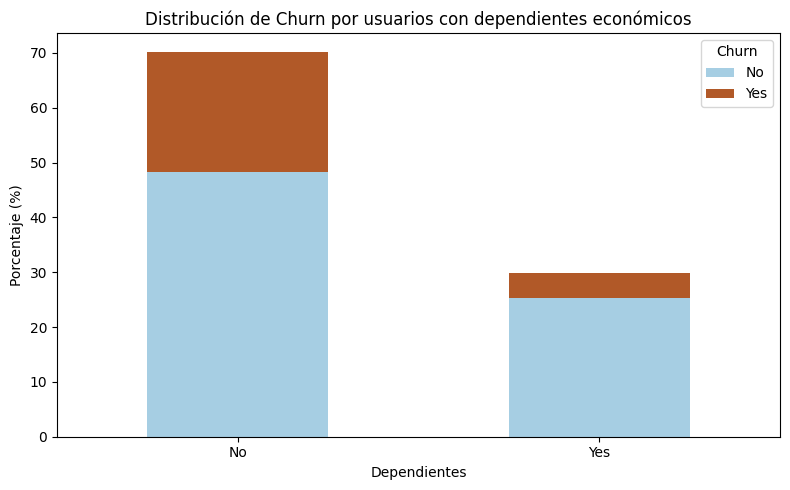

In [56]:
import matplotlib.pyplot as plt

# Gráfica de barras apiladas (transponer para agrupar por género)
frecuencia.T.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Paired')

# Personalización del gráfico
plt.title("Distribución de Churn por usuarios con dependientes económicos")
plt.xlabel("Dependientes")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Churn")
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [57]:
frecuencia = pd.crosstab (df_encoded['Churn'],
                         df_encoded['PaperlessBilling'], normalize= True).round(4)*100
frecuencia.rename(index = churn, inplace = True)
frecuencia.rename(columns = PaperlessBilling, inplace = True)
frecuencia


PaperlessBilling,No,Yes
Churn,,
No,34.06,39.36
Yes,6.67,19.91


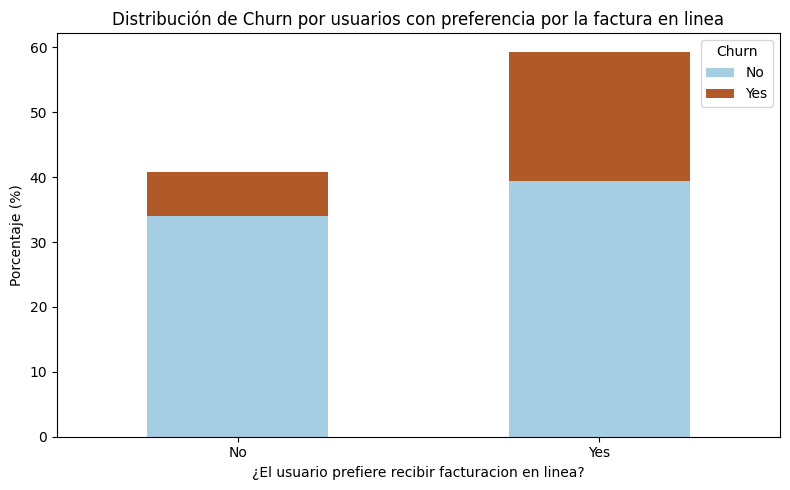

In [58]:
import matplotlib.pyplot as plt

# Gráfica de barras apiladas (transponer para agrupar por género)
frecuencia.T.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Paired')

# Personalización del gráfico
plt.title("Distribución de Churn por usuarios con preferencia por la factura en linea")
plt.xlabel("¿El usuario prefiere recibir facturacion en linea?")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Churn")
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [59]:
frecuencia = pd.crosstab (df_encoded['Churn'],
                         df_encoded['PhoneService_Yes'], normalize= True).round(4)*100
frecuencia.rename(index = churn, inplace = True)
frecuencia.rename(columns = PhoneService , inplace = True)
frecuencia
#PhoneService: suscripción al servicio telefónico
#66.17 si tienen servicio de telefono y no estan en riesgo de cancelar su contrato
#2.42 no tienen servicio de telefono y si estan en riesgo de cancelar su contrato

PhoneService_Yes,False,True
Churn,,
No,7.25,66.17
Yes,2.42,24.16


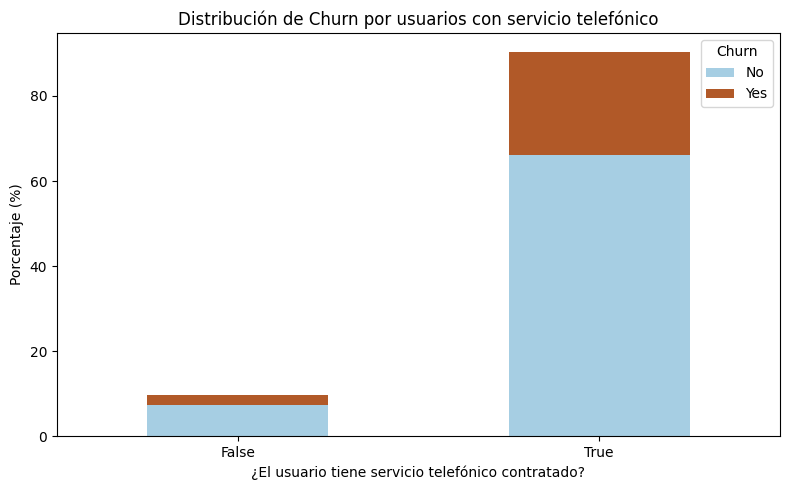

In [60]:
import matplotlib.pyplot as plt

# Gráfica de barras apiladas (transponer para agrupar por género)
frecuencia.T.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Paired')

# Personalización del gráfico
plt.title("Distribución de Churn por usuarios con servicio telefónico")
plt.xlabel("¿El usuario tiene servicio telefónico contratado?")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Churn")
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [61]:
frecuencia = pd.crosstab (df_encoded['Churn'],
                         df_encoded['StreamingTV_Yes'], normalize= True).round(4)*100
frecuencia.rename(index = churn, inplace = True)
frecuencia.rename(columns = StreamingTV, inplace = True)
frecuencia


StreamingTV_Yes,False,True
Churn,,
No,46.56,26.86
Yes,15.00,11.58


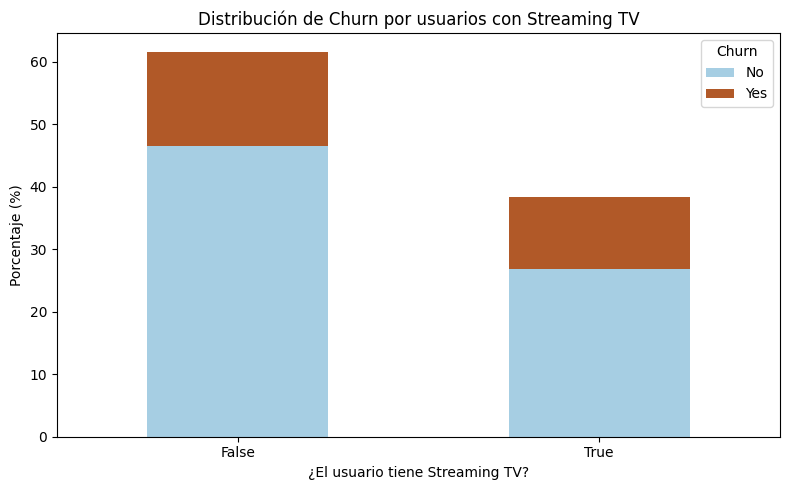

In [62]:
import matplotlib.pyplot as plt

# Gráfica de barras apiladas (transponer para agrupar por género)
frecuencia.T.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Paired')

# Personalización del gráfico
plt.title("Distribución de Churn por usuarios con Streaming TV")
plt.xlabel("¿El usuario tiene Streaming TV?")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Churn")
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [63]:
frecuencia = pd.crosstab (df_encoded['Churn'],
                         df_encoded['StreamingMovies_Yes'], normalize= True).round(4)*100
frecuencia.rename(index = churn, inplace = True)
frecuencia.rename(columns = StreamingMovies, inplace = True)
frecuencia


StreamingMovies_Yes,False,True
Churn,,
No,46.22,27.20
Yes,14.95,11.63


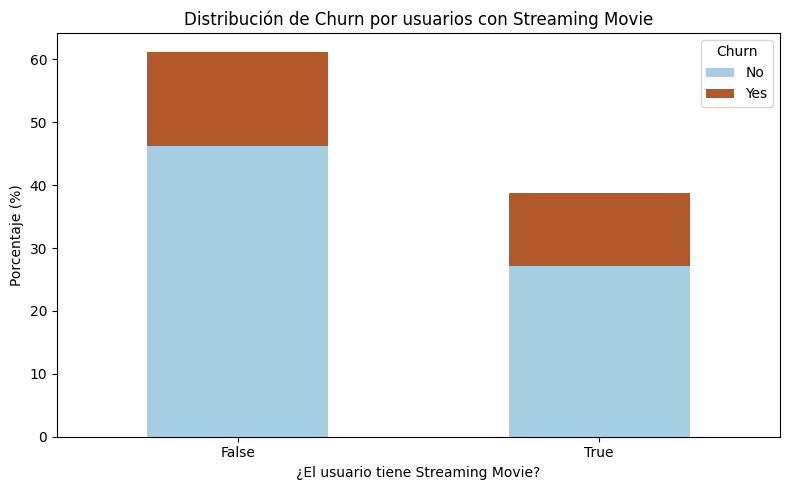

In [64]:
import matplotlib.pyplot as plt

# Gráfica de barras apiladas (transponer para agrupar por género)
frecuencia.T.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Paired')

# Personalización del gráfico
plt.title("Distribución de Churn por usuarios con Streaming Movie")
plt.xlabel("¿El usuario tiene Streaming Movie?")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Churn")
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [65]:
frecuencia = pd.crosstab (df_encoded['Churn'],
                         df_encoded['InternetService_No'], normalize= True).round(4)*100
frecuencia.rename(index = churn, inplace = True)
frecuencia.rename(columns = NoInternetService, inplace = True)
frecuencia

InternetService_No,False,True
Churn,,
No,53.41,20.01
Yes,24.97,1.61


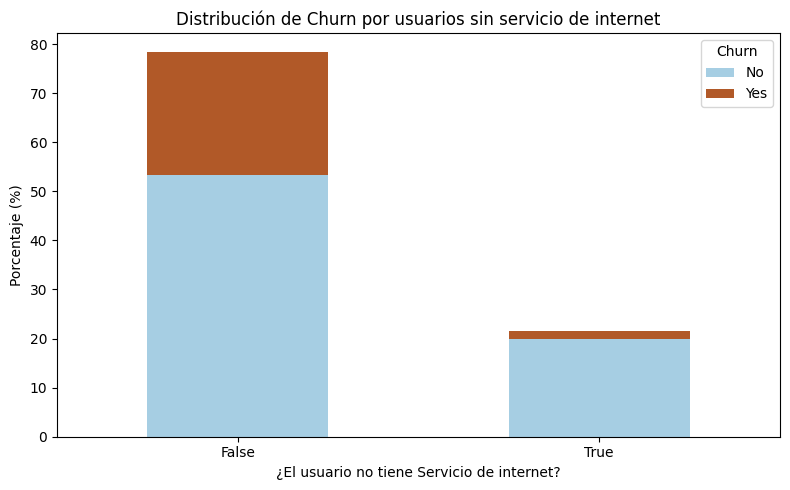

In [66]:
import matplotlib.pyplot as plt

# Gráfica de barras apiladas (transponer para agrupar por género)
frecuencia.T.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Paired')

# Personalización del gráfico
plt.title("Distribución de Churn por usuarios sin servicio de internet")
plt.xlabel("¿El usuario no tiene Servicio de internet?")
plt.ylabel("Porcentaje (%)")
plt.legend(title="Churn")
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar gráfico
plt.show()

##Tabla de frecuencia Tenure##

In [67]:
import numpy as np

In [68]:
#tamaño de base de datos, n es el número de filas
df_encoded.shape[0]

7032

In [69]:
k = 1 + (10/3)*np.log10(df_encoded.shape[0])
k

np.float64(13.82359620688572)

In [70]:
frecuencia_sturges = pd.value_counts(
                    pd.cut(x=df_encoded['tenure'],
                           bins=13,
                           include_lowest = True
                           ))

frecuencia_sturges

/tmp/ipython-input-70-1066207502.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frecuencia_sturges = pd.value_counts(


,count
tenure,
"(0.928, 6.462]",1470
"(66.538, 72.0]",944
"(6.462, 11.923]",588
"(11.923, 17.385]",568
"(22.846, 28.308]",466
"(55.615, 61.077]",424
"(44.692, 50.154]",401
"(17.385, 22.846]",394
"(61.077, 66.538]",387


In [71]:
porcentaje_sturges = pd.value_counts(
                     pd.cut(

                         x=df_encoded['tenure'],
                           bins=13,
                           include_lowest = True
                           ),
                           sort = False,
                          normalize = True
                       )*100


porcentaje_sturges

/tmp/ipython-input-71-918930494.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porcentaje_sturges = pd.value_counts(


,proportion
tenure,
"(0.928, 6.462]",20.904437
"(6.462, 11.923]",8.361775
"(11.923, 17.385]",8.077361
"(17.385, 22.846]",5.602958
"(22.846, 28.308]",6.626849
"(28.308, 33.769]",4.863481
"(33.769, 39.231]",5.446530
"(39.231, 44.692]",4.479522
"(44.692, 50.154]",5.702503


In [72]:
dist_frec_cuantitativa_amplitud_fija = pd.DataFrame({'Frecuencia' : frecuencia_sturges, 'Porcentaje %' : porcentaje_sturges})
dist_frec_cuantitativa_amplitud_fija

,Frecuencia,Porcentaje %
tenure,,
"(0.928, 6.462]",1470,20.904437
"(6.462, 11.923]",588,8.361775
"(11.923, 17.385]",568,8.077361
"(17.385, 22.846]",394,5.602958
"(22.846, 28.308]",466,6.626849
"(28.308, 33.769]",342,4.863481
"(33.769, 39.231]",383,5.446530
"(39.231, 44.692]",315,4.479522
"(44.692, 50.154]",401,5.702503


In [73]:
import seaborn as sns

<Axes: title={'center': 'Distribucion de frecuencia - Tenure'}, xlabel='Tenure (meses)', ylabel='Count'>

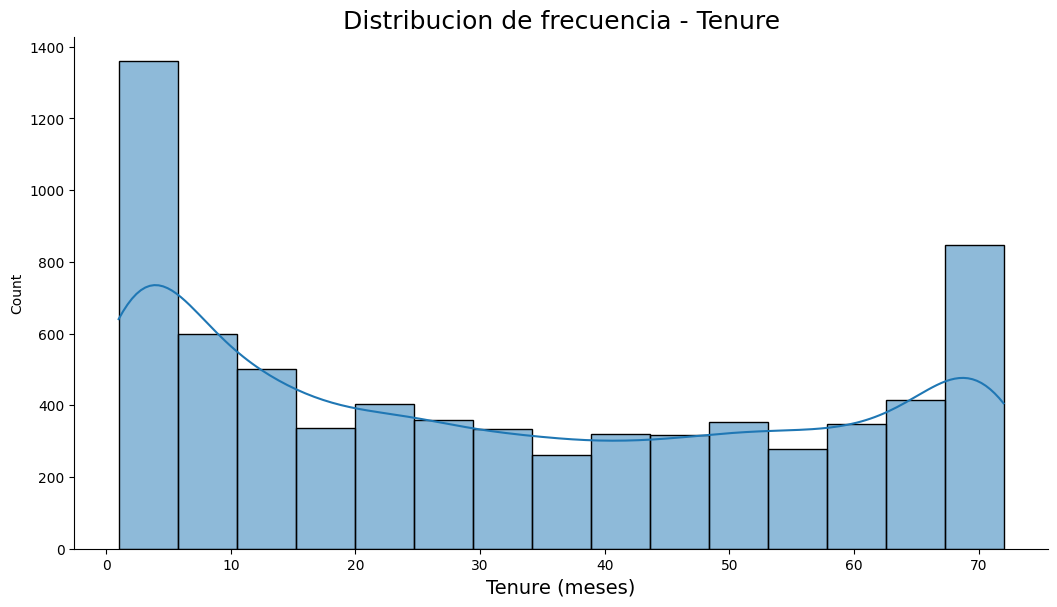

In [74]:
g = sns.displot(df_encoded['tenure'], kde = True)
g.figure.set_size_inches(12,6)

ax=g.ax
ax.set_title('Distribucion de frecuencia - Tenure', fontsize =18)
ax.set_xlabel('Tenure (meses)', fontsize = 14)
ax

In [75]:
df_encoded['tenure'].mean()

np.float64(32.421786120591584)

In [76]:
df_encoded.groupby(['Churn'])['tenure'].mean()

,tenure
Churn,
0,37.650010
1,17.979133


In [77]:
tenure = df_encoded['tenure']
tenure

,tenure
0,9
1,9
2,4
3,13
4,3
...,...
7027,13
7028,22
7029,2
7030,67


In [78]:
tenure = tenure.sort_values()
tenure

,tenure
2908,1
6969,1
48,1
6996,1
19,1
...,...
1665,72
6983,72
2933,72
5248,72


In [79]:
tenure = tenure.reset_index()
tenure

,index,tenure
0,2908,1
1,6969,1
2,48,1
3,6996,1
4,19,1
...,...,...
7027,1665,72
7028,6983,72
7029,2933,72
7030,5248,72


In [80]:
n = df_encoded.shape[0]

In [81]:
md_tenure =int( n/2)
md_tenure

3516

In [82]:
md_tenure = (tenure.loc[md_tenure-1][1] + tenure.loc[md_tenure][1])/2
md_tenure

/tmp/ipython-input-82-4140388495.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  md_tenure = (tenure.loc[md_tenure-1][1] + tenure.loc[md_tenure][1])/2


np.float64(29.0)

In [83]:
md_tenure = df_encoded['tenure'].median()

In [84]:
moda_tenure = df_encoded['tenure'].mode()

In [85]:
moda = 1
mediana = 29
media = 32.42

In [86]:
moda < mediana < media

True

##Tabla de frecuencia cuentas diarias##

In [87]:
frecuencia_sturges = pd.value_counts(
                    pd.cut(x=df_encoded['Cuentas_Diarias'],
                           bins=13,
                           include_lowest = True
                           ))

frecuencia_sturges

/tmp/ipython-input-87-3671503438.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frecuencia_sturges = pd.value_counts(


,count
Cuentas_Diarias,
"(0.596, 0.854]",1576
"(2.377, 2.631]",741
"(2.885, 3.138]",711
"(2.631, 2.885]",679
"(3.138, 3.392]",572
"(1.615, 1.869]",560
"(2.123, 2.377]",553
"(3.392, 3.646]",510
"(1.869, 2.123]",340


In [88]:
porcentaje_sturges = pd.value_counts(
                     pd.cut(

                         x=df_encoded['Cuentas_Diarias'],
                           bins=13,
                           include_lowest = True
                           ),
                           sort = False,
                          normalize = True
                       )*100


porcentaje_sturges

/tmp/ipython-input-88-1712732034.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porcentaje_sturges = pd.value_counts(


,proportion
Cuentas_Diarias,
"(0.596, 0.854]",22.411832
"(0.854, 1.108]",1.663823
"(1.108, 1.362]",2.630830
"(1.362, 1.615]",4.621729
"(1.615, 1.869]",7.963595
"(1.869, 2.123]",4.835040
"(2.123, 2.377]",7.864050
"(2.377, 2.631]",10.537543
"(2.631, 2.885]",9.655859


In [89]:
dist_frec_cuantitativa_amplitud_fija = pd.DataFrame({'Frecuencia' : frecuencia_sturges, 'Porcentaje %' : porcentaje_sturges})
dist_frec_cuantitativa_amplitud_fija

,Frecuencia,Porcentaje %
Cuentas_Diarias,,
"(0.596, 0.854]",1576,22.411832
"(0.854, 1.108]",117,1.663823
"(1.108, 1.362]",185,2.630830
"(1.362, 1.615]",325,4.621729
"(1.615, 1.869]",560,7.963595
"(1.869, 2.123]",340,4.835040
"(2.123, 2.377]",553,7.864050
"(2.377, 2.631]",741,10.537543
"(2.631, 2.885]",679,9.655859


In [90]:
import seaborn as sns


<Axes: title={'center': 'Distribucion de frecuencia - Cuentas Diarias'}, xlabel='Cuentas Diarias (pesos)', ylabel='Count'>

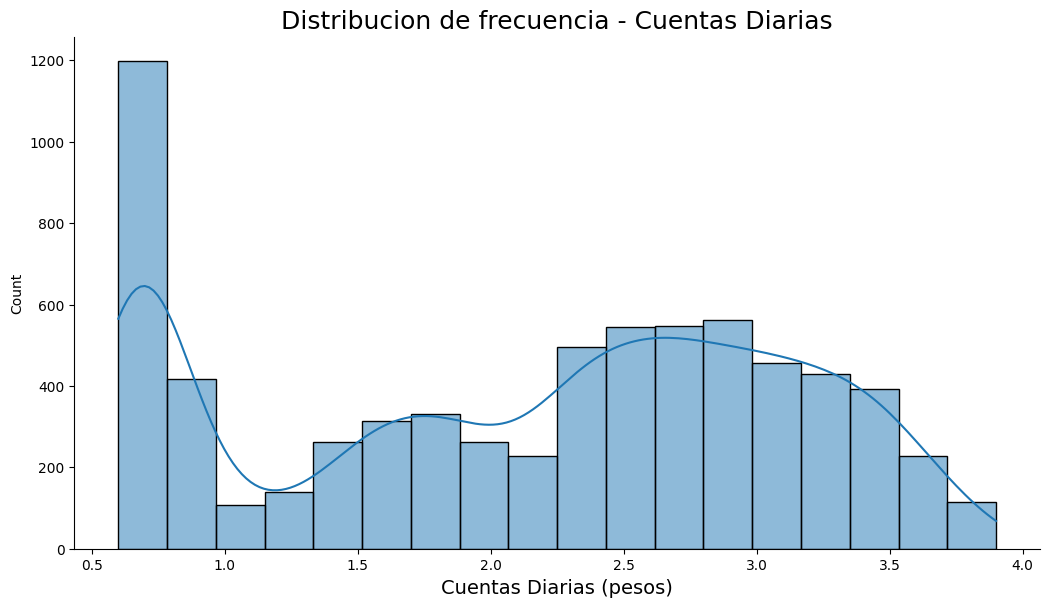

In [91]:
g = sns.displot(df_encoded['Cuentas_Diarias'], kde = True)
g.figure.set_size_inches(12,6)

ax=g.ax
ax.set_title('Distribucion de frecuencia - Cuentas Diarias', fontsize =18)
ax.set_xlabel('Cuentas Diarias (pesos)', fontsize = 14)
ax

In [92]:
df_encoded['Cuentas_Diarias'].mean()

np.float64(2.1287187144482367)

In [93]:
df_encoded.groupby(['Churn'])['Cuentas_Diarias'].mean()

,Cuentas_Diarias
Churn,
0,2.014071
1,2.445425


In [94]:
cuentas_diarias = df_encoded['Cuentas_Diarias']
cuentas_diarias

,Cuentas_Diarias
0,2.16
1,1.97
2,2.43
3,3.22
4,2.76
...,...
7027,1.81
7028,2.80
7029,1.65
7030,2.23


In [95]:
cuentas_diarias = cuentas_diarias.sort_values()
cuentas_diarias

,Cuentas_Diarias
6862,0.60
4832,0.60
562,0.61
7000,0.61
421,0.61
...,...
5813,3.89
4057,3.90
6334,3.90
5350,3.90


In [96]:
n = cuentas_diarias.shape[0]
n

7032

In [97]:
cuentas_diarias = cuentas_diarias.reset_index()
cuentas_diarias

,index,Cuentas_Diarias
0,6862,0.60
1,4832,0.60
2,562,0.61
3,7000,0.61
4,421,0.61
...,...,...
7027,5813,3.89
7028,4057,3.90
7029,6334,3.90
7030,5350,3.90


In [98]:
md_cuentas =int( n/2)
md_cuentas

3516

In [99]:
md_cuentas = (cuentas_diarias.loc[md_cuentas-1][1]+cuentas_diarias.loc[md_cuentas][1])/2
md_cuentas

/tmp/ipython-input-99-2092267316.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  md_cuentas = (cuentas_diarias.loc[md_cuentas-1][1]+cuentas_diarias.loc[md_cuentas][1])/2


np.float64(2.31)

In [100]:
md_cuentas = df_encoded['Cuentas_Diarias'].median()

In [101]:
moda_cuentas = df_encoded['Cuentas_Diarias'].mode()
moda_cuentas

,Cuentas_Diarias
0,0.66


In [102]:
moda = 0.66
mediana = 2.31
media = 2.13

In [103]:
moda < media < mediana

True

##Tabla de frecuencia Cargos totales##

In [104]:
frecuencia_sturges = pd.value_counts(
                    pd.cut(x=df_encoded['Charges.Total'],
                           bins=13,
                           include_lowest = True
                           ))

frecuencia_sturges

/tmp/ipython-input-104-1085652328.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frecuencia_sturges = pd.value_counts(


,count
Charges.Total,
"(10.133000000000001, 685.415]",2362
"(685.415, 1352.031]",1083
"(1352.031, 2018.646]",749
"(2018.646, 2685.262]",466
"(2685.262, 3351.877]",378
"(3351.877, 4018.492]",361
"(4018.492, 4685.108]",327
"(4685.108, 5351.723]",316
"(5351.723, 6018.338]",305


In [105]:
porcentaje_sturges = pd.value_counts(
                     pd.cut(

                         x=df_encoded['Charges.Total'],
                           bins=13,
                           include_lowest = True
                           ),
                           sort = False,
                          normalize = True
                       )*100


porcentaje_sturges

/tmp/ipython-input-105-820838262.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  porcentaje_sturges = pd.value_counts(


,proportion
Charges.Total,
"(10.133000000000001, 685.415]",33.589306
"(685.415, 1352.031]",15.401024
"(1352.031, 2018.646]",10.651308
"(2018.646, 2685.262]",6.626849
"(2685.262, 3351.877]",5.375427
"(3351.877, 4018.492]",5.133675
"(4018.492, 4685.108]",4.650171
"(4685.108, 5351.723]",4.493743
"(5351.723, 6018.338]",4.337315


In [106]:
dist_frec_cuantitativa_amplitud_fija = pd.DataFrame({'Frecuencia' : frecuencia_sturges, 'Porcentaje %' : porcentaje_sturges})
dist_frec_cuantitativa_amplitud_fija

,Frecuencia,Porcentaje %
Charges.Total,,
"(10.133000000000001, 685.415]",2362,33.589306
"(685.415, 1352.031]",1083,15.401024
"(1352.031, 2018.646]",749,10.651308
"(2018.646, 2685.262]",466,6.626849
"(2685.262, 3351.877]",378,5.375427
"(3351.877, 4018.492]",361,5.133675
"(4018.492, 4685.108]",327,4.650171
"(4685.108, 5351.723]",316,4.493743
"(5351.723, 6018.338]",305,4.337315


<Axes: title={'center': 'Distribucion de frecuencia - Cargos totales '}, xlabel='Cargos totales (pesos)', ylabel='Count'>

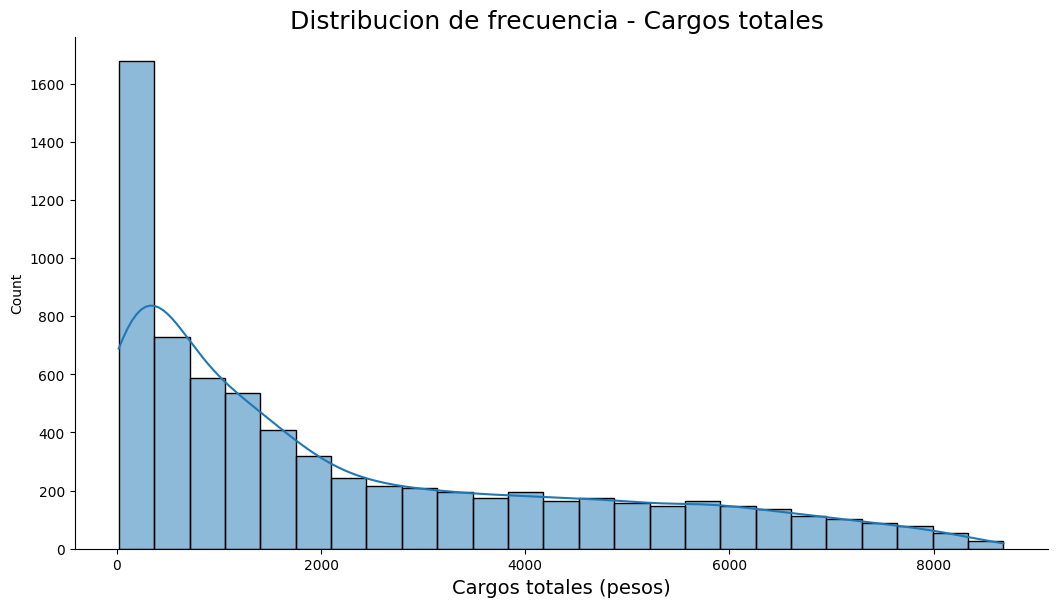

In [107]:
g = sns.displot(df_encoded['Charges.Total'], kde = True)
g.figure.set_size_inches(12,6)

ax=g.ax
ax.set_title('Distribucion de frecuencia - Cargos totales ', fontsize =18)
ax.set_xlabel('Cargos totales (pesos)', fontsize = 14)
ax

In [108]:
df_encoded['Charges.Total'].mean()

np.float64(2283.3004408418656)

In [109]:
md_cuentas = df_encoded['Charges.Total'].median()
md_cuentas

1397.475

In [110]:
moda_cuentas = df_encoded['Charges.Total'].mode()
moda_cuentas

,Charges.Total
0,20.2


In [111]:
df_encoded.groupby(['Churn'])['Charges.Total'].mean()

,Charges.Total
Churn,
0,2555.344141
1,1531.796094


##Conclusiones e Insights##

Análisis de Cancelación de Clientes en Telecom.x

**Tipo de contrato y cancelación**

Los clientes con contrato mensual tienen una mayor probabilidad de cancelar su cuenta en comparación con aquellos que optan por contratos anuales o bianuales por lo que promover contratos con beneficios atractivos puede ayudar a disminuir la tasa de cancelación.


**Edad de los clientes**

Las personas menores de 65 años representan tanto la mayoría de los clientes como el grupo con mayor número de cancelaciones.


**Género**

El género no es un factor relevante, ya que la proporción de cancelaciones es muy similar entre hombres y mujeres.


**Dependientes económicos**

Un porcentaje significativo (25.21%) de las personas sin dependientes económicos cancela su cuenta, lo que indica que la falta de responsabilidad financiera hacia otros podría influir en la decisión de cancelar. Enfocarse en ofrecer promociones enfocadas en individuos o diseñar campañas que refuercen el valor personal del servicio podría beneficiar el compromiso de este sector de la población con la compañia.


**Tipo de facturación**

Los usuarios que reciben la factura en línea son más propensos a cancelar el servicio que aquellos que reciben facturas físicas.


**Servicios contratados**

La mayoría de los usuarios tienen contratado el servicio de telefonía, por lo que la mayoría de las cancelaciones provienen también de este grupo.

Los usuarios con servicio de Streaming TV cancelan con mayor frecuencia que aquellos que solo tienen Streaming de películas.

La tasa de cancelación es similar entre los usuarios de internet y los de telefonía.

Revisar la percepción de valor del servicio de Streaming evaluando la calidad del contenido, la comparación con competidores y el precio del paquete para ajustar la oferta o el precio.


**Antigüedad del cliente**

Aproximadamente el 20.90% de los clientes tienen solo un mes con el servicio, lo que indica que la empresa tiene muchos clientes nuevos. Centrarse en la retención de este segmento  aportando valor inmediato y soporte puede ayudar a disminuir las cancelaciones tempranas.

En promedio, los clientes que cancelan lo hacen antes de cumplir 18 meses con la compañía por lo que los programas de lealtad son una estrategia a considerar para este segmento.

Después de los 38 meses, la probabilidad de cancelación disminuye considerablemente por lo que el enfoque en la satisfacción y evitar los cambios drásticos son esenciales.


**Ingresos y pérdida económica**

En promedio, los clientes que cancelan pagan 44 centavos más por día que aquellos que se mantienen.

Los clientes con contratos a largo plazo generan más beneficios para la empresa, ya que aseguran el pago constante del servicio y presentan una media de cargos totales más alta en comparación con quienes cancelan en los primeros meses.